# Análise Exploratória dos dados EDA - Camada Bronze

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/home/jovyan/work/src/bronze/vehicle_price_prediction.csv')
df.head()


,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [14]:
print('informações do dataset:')
df.info()

informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1000000 non-null  object 
 1   model             1000000 non-null  object 
 2   year              1000000 non-null  int64  
 3   mileage           1000000 non-null  int64  
 4   engine_hp         1000000 non-null  int64  
 5   transmission      1000000 non-null  object 
 6   fuel_type         1000000 non-null  object 
 7   drivetrain        1000000 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  int64  
 12  accident_history  249867 non-null   object 
 13  seller_type       1000000 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 

In [15]:
repetidas = df.duplicated().sum()
print(f'Quantidades de tuplas duplicadas: {repetidas}')

Quantidades de tuplas duplicadas: 0


In [16]:
print('Valores nulos por coluna:')
df.isnull().sum().sort_values(ascending=False)

Valores nulos por coluna:


accident_history    750133
make                     0
model                    0
brand_popularity         0
mileage_per_year         0
vehicle_age              0
trim                     0
condition                0
seller_type              0
owner_count              0
interior_color           0
exterior_color           0
body_type                0
drivetrain               0
fuel_type                0
transmission             0
engine_hp                0
mileage                  0
year                     0
price                    0
dtype: int64

In [17]:
colunas_categoricas = [
    'model',
    'make',
    'transmission',
    'drivetrain',
    'body_type',
    'exterior_color',
    'interior_color',
    'seller_type',
    'condition',
    'trim'
]

for coluna in colunas_categoricas:
    print(f'Análise coluna {coluna}:')

    contagem = df[coluna].value_counts()

    print(f'Quantidade de categoria únicas {df[coluna].nunique()}')
    print(contagem)
    print("\n" + "="*50 + "\n")

Análise coluna model:
Quantidade de categoria únicas 105
model
300         20202
Pacifica    19857
2500        13539
3500        13464
Charger     13457
            ...  
RAV4         7880
Escape       7879
3 Series     7871
Corolla      7837
X5           7823
Name: count, Length: 105, dtype: int64


Análise coluna make:
Quantidade de categoria únicas 25
make
Kia              40484
Mazda            40247
Subaru           40230
Tesla            40226
Nissan           40217
Porsche          40210
Ram              40148
Acura            40147
Land Rover       40133
Chrysler         40059
Volkswagen       40054
Dodge            40035
Audi             40022
Honda            40015
Jeep             40006
Chevrolet        39982
Lexus            39921
Cadillac         39847
Ford             39842
Volvo            39842
BMW              39840
Mercedes-Benz    39794
GMC              39754
Toyota           39627
Hyundai          39318
Name: count, dtype: int64


Análise coluna transmission:
Quanti

Distribuição por tipo de combustível:


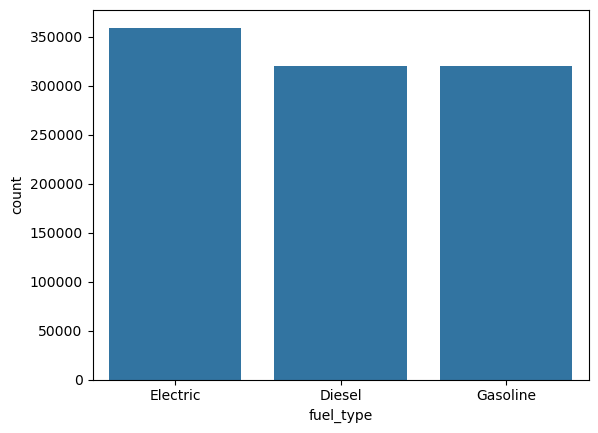

In [18]:
print('Distribuição por tipo de combustível:')
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
plt.show()

In [19]:
display(df[['price','mileage','year','engine_hp','vehicle_age','mileage_per_year','owner_count']].describe())

,price,mileage,year,engine_hp,vehicle_age,mileage_per_year,owner_count
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,20329.302593,112660.126464,2017.453816,235.664301,7.585987,14540.674200,3.477846
std,13644.467189,72088.236925,3.902285,93.614773,3.829534,6108.901522,1.544856
min,1500.000000,500.000000,2000.000000,90.000000,1.000000,33.333333,1.000000
25%,10324.527500,57654.000000,2015.000000,162.000000,5.000000,10487.633523,2.000000
50%,17864.740000,103331.000000,2018.000000,215.000000,7.000000,14688.118056,4.000000
75%,27601.402500,157865.000000,2020.000000,300.000000,10.000000,18685.942308,5.000000
max,93422.090000,300000.000000,2025.000000,581.000000,25.000000,55391.000000,5.000000


Distribuição dos preços (maior frequência no pico da curva):


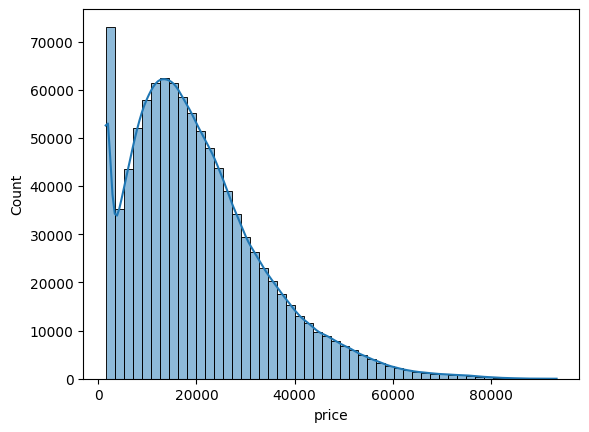

In [73]:
print('Distribuição dos preços (maior frequência no pico da curva):')
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.show()

Boxplot dos preços (Análise de Outliers):


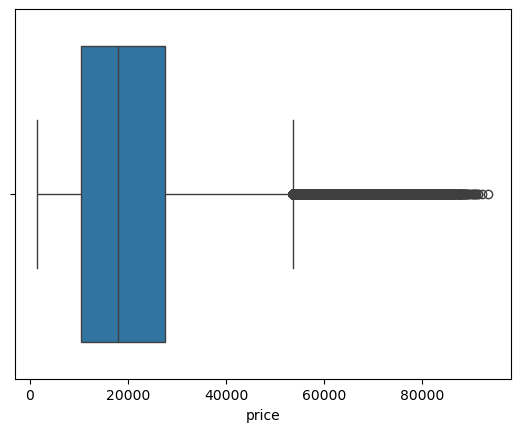

In [20]:
print("Boxplot dos preços (Análise de Outliers):")
sns.boxplot(data=df,x='price')
plt.show()

# 4. Conclusões da Análise Exploratória e Decisões para o ETL

---

## **1. Qualidade e Integridade dos Dados**
* **Dados Nulos:** A descoberta mais significativa é na coluna `accident_history`, que possui **750.133 valores nulos (75% do dataset)**. Todas as outras 19 colunas estão 100% preenchidas.
* **Dados Duplicados:** Não foi encontrada **nenhuma linha duplicada** no conjunto de dados.
* **Tipos de Dados:** A análise com `.info()` confirmou que alguns tipos de dados estão corretos de acordo com o dicionário, mas o pandas considerou como object tudo que era textual, o que não é bom.

## **2. Análise das Distribuições**
* **Dados Categóricos:** As colunas categóricas (`transmission`, `fuel_type`, `exterior_color`, etc.) estão **limpas e padronizadas**.     
* **Dados Numéricos (`price`):**
    * A tabela do `.describe()` mostra que o preço médio dos veículos é de **$20.329**.
    * O histograma revela uma **distribuição assimétrica positiva (à direita)**, o que é típico para dados de preço. Isso significa que a maioria dos veículos se concentra em faixas de preço mais baixas, com uma "cauda" longa de veículos mais caros e menos frequentes.
    * O boxplot confirma visualmente essa assimetria e destaca a presença de um **grande número de outliers** em preços mais altos (aproximadamente acima de $55.000).

---

## Decisões para o Processo de ETL


1.  **Tratamento de Nulos:** Devido a quantidade de volume de nulos, a coluna `accident_history` não vai ser descartada. Em vez disso, os valores nulos podem ser preenchidos com 'Desconhecido' ou 'unknown'. Isso preserva a informação e a integridade do restante da linha.

2.  **Foco na Estruturação:** Como os dados já se mostraram limpos e padronizados, o ETL não precisará de muita limpeza. O foco principal será na **transformação estrutural**: "fatiar" o DataFrame único em múltiplos DataFrames que corresponderão às tabelas do nosso modelo Silver (`dim_marca`, `dim_modelo`, `fato_anuncio_veiculo`, etc.).

3.  **Manutenção de Outliers:** Os outliers de preço identificados serão **mantidos**. Eles são considerados pontos de dados válidos que representam veículos de luxo ou de alto valor, e sua remoção poderia enviesar futuras análises.

4.  **Tipos de dados Object:** Precisamos converter o tipo dos dados para um tipo correto e definido.
